# Imports

In [7]:
import tensorflow as tf
import pydot
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# Sequential API's

In [8]:
def build_model_with_sequential():
    seq_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    return seq_model

# Functional API

In [9]:
def build_model_with_functional(output=10, activation='softmax'):
    # initiate the input layer
    input1 = Input(shape=(28, 28))
    x = tf.keras.layers.Flatten()(input1)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    output_layer = tf.keras.layers.Dense(output, activation=activation)(x)

    # declare inputs and outputs
    fun_model = Model(inputs=input1, outputs=output_layer)
    return fun_model

# build and visualize model


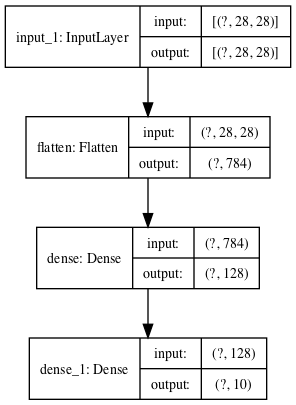

In [10]:
model = build_model_with_functional()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
model.summary()

In [12]:
## Load data
mnist = tf.keras.datasets.fashion_mnist
(train_x, train_labels), (test_x, test_labels) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0

In [ ]:
## Model

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(train_x,train_labels, verbose=1, epochs=5)
model.evaluate(test_x, test_labels)